In [1]:
## overall plan: short and to the point in itemized form
##introduction section
#0 show the node id labels for a single feature each
task0 = "show the node id labels for a single feature each"
#1 show ring network
task1 = "show the ring network "
#2 show ring network for k=[0,...,K] and the adjacency and normalized adjacency matrix as well (3 sets of matrix)
task2 = "show ring/adjacency/S networks and matrices for k=[0,...,N]"
##methodology section
#3 produce a method/tool to monitor/analyze the label changes on the overall network 
#4 show it on a situation with 2D features per node
#5 show how a famous network like Zachary can display a spread of ideologies and monitor
#6 infer the parameters with SGC and then run the simulation on that for same results

#paper points
#we assume that the difference between a markov chain or a 
#control theory perspective is that the markov chain or the 
#recursive function the state of the nodes change. HERE WE ASSUME
#THAT THE NODES STAY THE SAME WITH THEIR NATURAL FIXED PREDISPOSITIONS
#AND THAT THEIR ENVIRONMENT SHIFTS THEIR PERSPECTIVE. 
#so we start with a single features and see how the environment changes
#them according to different degrees of interaction.
#and that the dynamics of the interactions are constant as well.
#we consider 'k' to be equivalent to a social process 'epoch'
#time index which registers new time points of social exchange 
#without underlying user change.

"show ring/adjacency/S networks and matrices for k=[0,...,N]"

In [4]:
using LinearAlgebra, Plots, LightGraphs, DelimitedFiles, Random


In [5]:
##introduction

In [53]:
NN1 = 20;

blueNodes = [5,10,11,12,14,15];

varX = [];

K_MAX = 15

#all the adjacency matrices at different powers
Adj_Dict = []
#all the normed adjacency matrices at different powers
Adj_Normed_Dict = []

0-element Array{Any,1}

In [91]:
print(varX)

[0.010437603853343358; 0.5736485585190982; 0.9515912202226742; 0.14157320044138055; -0.06123889445033415; 0.2946007040142202; 0.17732488626145426; 0.37696271168717344; 0.6701156080253705; -0.503162226572557; -0.1974841855456475; -0.5877483905845917; 0.7050044033123641; -0.06339542250404717; -0.030020778748387933; 0.20473971707708083; 0.13018693389066338; 0.43185415395281557; 0.6453459147445986; 0.5464187663934021]

In [90]:
function makeSingleFeatureVect()
    global varX
    varX = rand(NN1,1)
    [varX[i] = -1 * rand() for i in blueNodes]
end
makeSingleFeatureVect();

In [95]:
function displaySingleFeature()    
    global varX
    varXwide = repeat(varX,outer=(1,6))
    hVarX = heatmap(varXwide,title="Node Features",
            yaxis=:flip,aspect_ratio=1.0,
            framestyle=:box,legend=nothing,ylims=(0.5,NN1+0.5),
            yticks=0:1:NN1,xticks=(1:5:6,["" ""]),xlims=(1,6),
            c=cgrad([:blue,:red]))
    return hVarX
end

function displayProjectedFeature(projectionX,powerInd)   
    varXwide = repeat(projectionX,outer=(1,6))
    hVarX = heatmap(varXwide,title="Regression power=$(powerInd)",
                yaxis=:flip,aspect_ratio=1.0,
                framestyle=:box,legend=nothing,ylims=(0.5,NN1+0.5),
                yticks=0:1:NN1,xticks=(1:5:6,["" ""]),xlims=(1,6),
                c=cgrad([:blue,:red]))
    return hVarX
end
#adding the thresholds for the colors
function displaySingleFeatureThres()    
    global varX
    varXwide = repeat(varX,outer=(1,6))
    hVarX = heatmap(varXwide,title="Node Features",
            yaxis=:flip,aspect_ratio=1.0,
            framestyle=:box,legend=nothing,ylims=(0.5,NN1+0.5),
            yticks=0:1:NN1,xticks=(1:5:6,["" ""]),xlims=(1,6),
            fill=cgrad([:blue,:red]),clims=(0,1))
    return hVarX
end

function displayProjectedFeatureThres(projectionX,powerInd)   
    varXwide = repeat(projectionX,outer=(1,6))
    hVarX = heatmap(varXwide,title="Regression power=$(powerInd)",
                yaxis=:flip,aspect_ratio=1.0,
                framestyle=:box,legend=nothing,ylims=(0.5,NN1+0.5),
                yticks=0:1:NN1,xticks=(1:5:6,["" ""]),xlims=(1,6),
                fill=cgrad([:blue,:red]),clims=(0,1))
    return hVarX
end

displayProjectedFeatureThres (generic function with 1 method)

In [78]:
function vizMatrix(Adj,powerInd)
    global NN1
    hAdjNN1 = heatmap(Adj,title="Adjacency Matrix, power=$(powerInd)",
        showaxis=true,yaxis=:flip,aspect_ratio=1.0,
        framestyle=:box,xlims=(0.0,NN1+1.0),
        legend=true,ylims=(0.0,NN1+0.5),
        yticks=0:5:NN1,xticks=0:5:NN1,
        fill=cgrad([:white,:black]))#c=cgrad([:white,:black],clims=(0,1)))
    return hAdjNN1
end
function vizMatrixNormed(Adj)
    global NN1
    hAdjNN1 = heatmap(Adj,title="Normalized Adjacency",
        showaxis=true,yaxis=:flip,aspect_ratio=1.0,
        framestyle=:box,xlims=(0.0,NN1+1.0),
        legend=true,ylims=(0.0,NN1+0.5),
        yticks=0:5:NN1,xticks=0:5:NN1,
        fill=cgrad([:white,:black]))
    return hAdjNN1
end
#so that the values of the color map are constrained between these values
function vizMatrixThresh(Adj,powerInd)
    global NN1
    hAdjNN1 = heatmap(Adj,title="Adjacency Matrix, power=$(powerInd)",
        showaxis=true,yaxis=:flip,aspect_ratio=1.0,
        framestyle=:box,xlims=(0.0,NN1+1.0),
        legend=true,ylims=(0.0,NN1+0.5),
        yticks=0:5:NN1,xticks=0:5:NN1,
        fill=cgrad([:white,:black]),clims=(0,1))#c=cgrad([:white,:black],clims=(0,1)))
    return hAdjNN1
end
function vizMatrixNormedThresh(Adj)
    global NN1
    hAdjNN1 = heatmap(Adj,title="Normalized Adjacency",
        showaxis=true,yaxis=:flip,aspect_ratio=1.0,
        framestyle=:box,xlims=(0.0,NN1+1.0),
        legend=true,ylims=(0.0,NN1+0.5),
        yticks=0:5:NN1,xticks=0:5:NN1,
        fill=cgrad([:white,:black]),clims=(0,1))
    return hAdjNN1
end

vizMatrixNormedThresh (generic function with 1 method)

In [10]:
function makeRingAdjacency()
    global NN1
    #make the adjacency for the ring network
    AdjNN1 = zeros(NN1,NN1)
    for ii in 1:size(AdjNN1)[1]
        for jj in 1:size(AdjNN1)[2]            
            if(ii == (jj+1))
                AdjNN1[ii,jj] = 1
            elseif(ii == (jj-1))
                AdjNN1[ii,jj] = 1
            end        
        end
    end
    AdjNN1[1,NN1] = 1
    AdjNN1[NN1,1] = 1    
    return AdjNN1
end

makeRingAdjacency (generic function with 1 method)

In [32]:
function adjacency2Smatrix(AdjMat)
    Adj = deepcopy(AdjMat)
    #make the diagonal for the adj matrix
    diag1 = zeros(size(Adj)[1],size(Adj)[2])
    [diag1[i,i]=1 for i in 1:size(diag1)[1]] 
    #add self-loops as the paper describes
    Adj .+= diag1
    #get degree matrix
    degrees = sum(Adj,dims=2)
    diag2 = zeros(size(Adj)[1],size(Adj)[2])
    [diag2[i,i]=degrees[i] for i in 1:size(diag1)[1]] 
    #make the diagonal matrix to the power of -1/2
    diag2 = diag2^(-1/2)
    #make the normalized S matrix
    S = diag2 * Adj * diag2
    return S
end    
    

adjacency2Smatrix (generic function with 1 method)

In [12]:
#define associated vector of attributes for each node that can be eg [burger, pizza]
#define the identity of each node as training data
function redStr(pol)
    rpol = round(pol,digits=1)
  
    if(rpol == 1.0)
        return "#FF5555"
    elseif(rpol == 0.9)
        return "#FE5555"
    elseif(rpol == 0.8)
        return "#EE6666"    
     elseif(rpol == 0.7)
        return "#ED6666"
     elseif(rpol == 0.6)
        return "#DD7777" 
    elseif(rpol == 0.5)
        return "#DC7777"
        elseif(rpol == 0.4)
        return "#CC8888"
        elseif(rpol == 0.3)
        return "#CB8888"
        elseif(rpol == 0.2)
        return "#BB9999"
        elseif(rpol == 0.1)
        return "#BA9999"
      elseif(rpol == 0.0)
        return "#AAAAAA"  
    end
end

function blueStr(pol)
    rpol = round(pol,digits=1)
  
    if(rpol == -1.0)
        return "#5555FF"
    elseif(rpol == -0.9)
        return "#5555FE"
    elseif(rpol == -0.8)
        return "#6666EE"    
     elseif(rpol == -0.7)
        return "#6666ED"
     elseif(rpol == -0.6)
        return "#7777DD" 
    elseif(rpol == -0.5)
        return "#7777DC"
        elseif(rpol == -0.4)
        return "#8888CC"
        elseif(rpol == -0.3)
        return "#8888CB"
        elseif(rpol == -0.2)
        return "#9999BB"
        elseif(rpol == -0.1)
        return "#9999BA"
      elseif(rpol == 0.0)
        return "#AAAAAA"  
    end
end


blueStr (generic function with 1 method)

In [13]:
function singleVarGraphVizImageMake(Adj,imageName)
    global varX
    strNN1=""
    #init
    strNN1 *= "strict digraph graphname { concentrate=true node [shape=circle, style=filled, fontsize=14] "
    #node insertions
    for ii in 1:size(Adj)[1]
        if(varX[ii] >= 0)
            tmpStr = redStr(varX[ii])        
            strNN1 *= "{node [style=filled,fillcolor=\"$(tmpStr)\"]"
            strNN1 *= " N$(ii) }"   
        else
            tmpStr = blueStr(varX[ii]) 
            strNN1 *= "{node [style=filled,fillcolor=\"$(tmpStr)\"]"
            strNN1 *= " N$(ii) }"   
        end
    end
    #edges insertion
    for ii in 1:size(Adj)[1]
        for jj in 1:size(Adj)[2]
            if(Adj[ii,jj] > 0)
                if(ii != jj)
                    strNN1 *= " N$(ii) -> N$(jj) [dir=both penwidth=$(Adj[ii,jj])];" #str *= " c -- d3 -- A2 -- a; "
                end
                if(ii == jj)
                    strNN1 *= " N$(ii) -> N$(jj) [penwidth=$(Adj[ii,jj])];" #str *= " c -- d3 -- A2 -- a; "
                end
            end
        end
    end
    #tie off
    strNN1 *= "}";
    fileNameNN1 = "$(imageName).dot"
    filePNGNN1 = "$(imageName).png"
    writedlm( string("./",fileNameNN1), [strNN1] ,quotes=false)
    run(`neato $fileNameNN1 -Tpng -o $filePNGNN1`)
    
end


singleVarGraphVizImageMake (generic function with 1 method)

In [14]:
#task0
println(task0)

show the node id labels for a single feature each


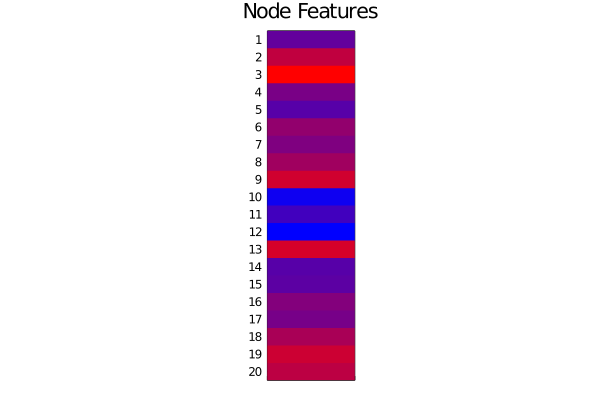

this feature set is fixed as personal inner voice


In [96]:
hVarX = displaySingleFeature()
p=plot(hVarX,layout=1)
display(p)
savefig(p,"nodeSingleFeatures.png")
println("this feature set is fixed as personal inner voice")

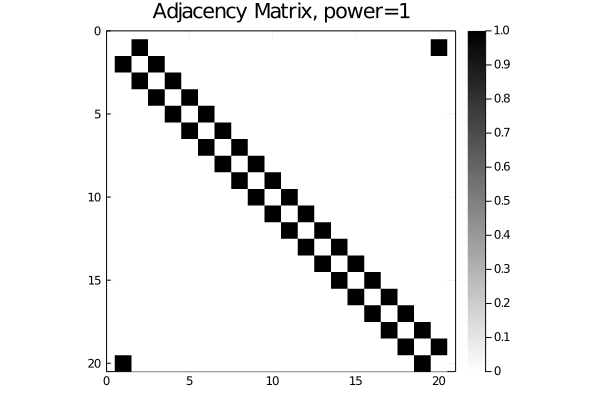

ring adj matrix


In [23]:
adjMatrix = makeRingAdjacency()
hVarX = vizMatrix(adjMatrix,1)
p1=plot(hVarX,layout=1)
display(p1)
savefig(p1,"adjmatrix.png")
println("ring adj matrix")

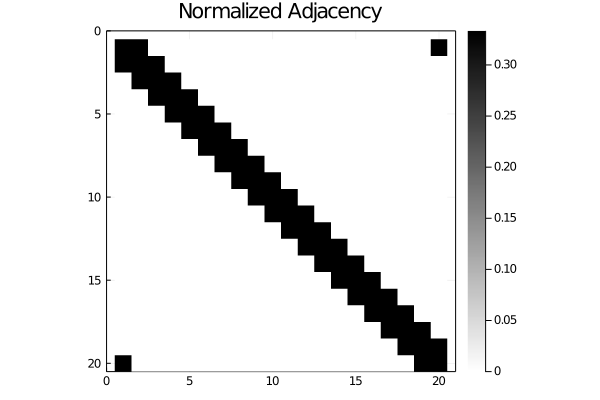

ring adj norm matrix


In [37]:
adjMatrixNorm = adjacency2Smatrix(deepcopy(adjMatrix))
hVarX2 = vizMatrixNormed(adjMatrixNorm)
p2=plot(hVarX2,layout=1)
display(p2)
savefig(p2,"adjmatrixNorm.png")
println("ring adj norm matrix")
adjMatrixNorm;

In [38]:
#task1
println(task1)

show the ring network 


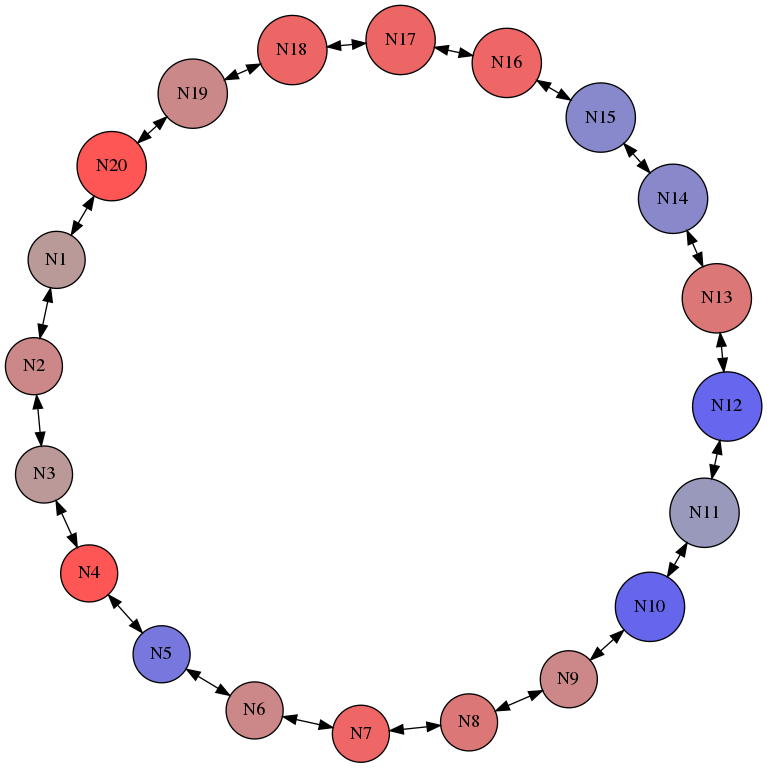

In [40]:
singleVarGraphVizImageMake(adjMatrix,"try")
display("image/png", read("try.png"))

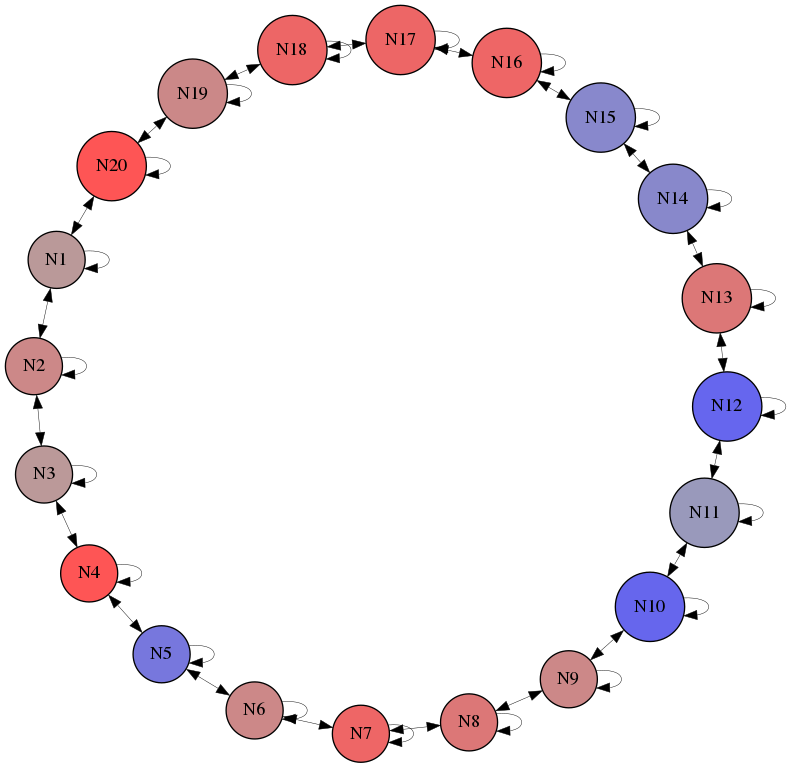

In [41]:
singleVarGraphVizImageMake(adjMatrixNorm,"try2")
display("image/png", read("try2.png"))

In [42]:
#task 2
println(task2)

show ring/adjacency/S networks and matrices for k=[0,...,N]


In [54]:
adjMatrixK1 = makeRingAdjacency()
Adj_Dict = Dict()
for i in 0:K_MAX   
    Adj_Dict[i] = adjMatrixK1^i
end


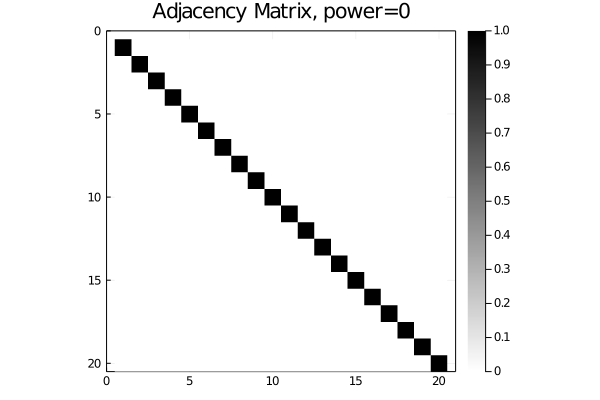

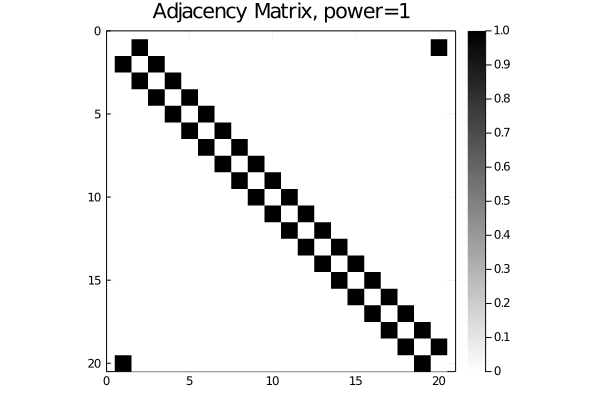

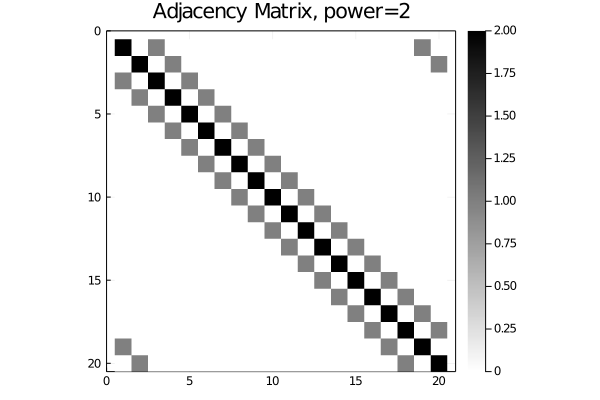

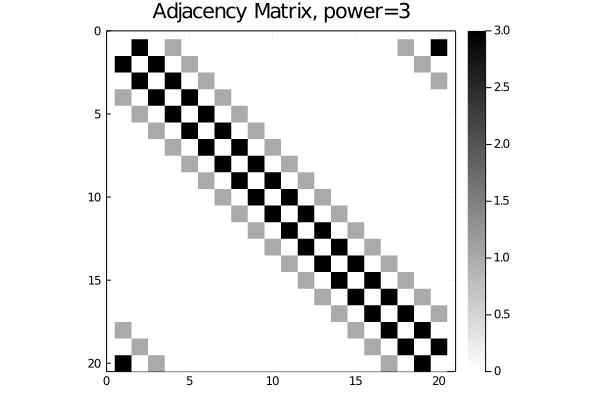

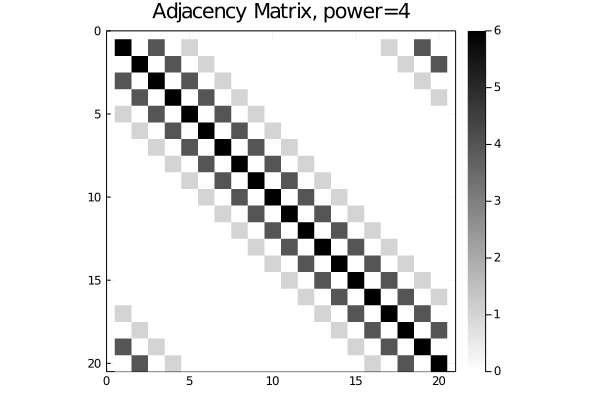

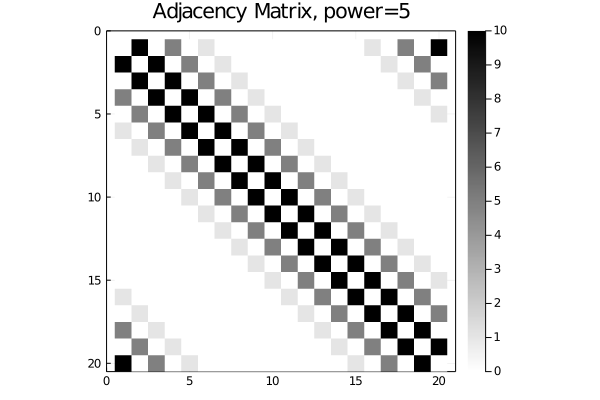

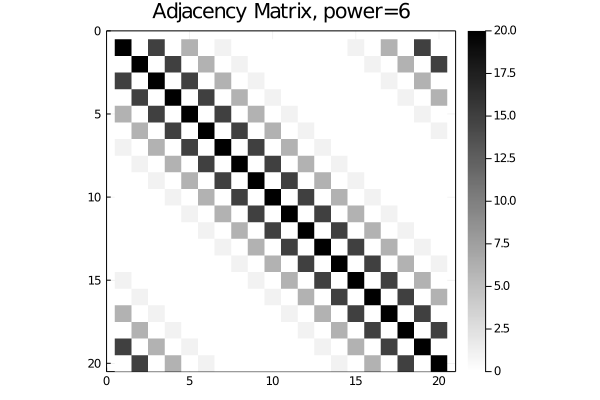

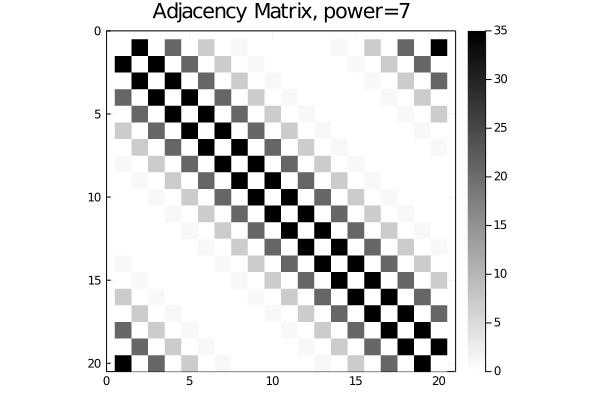

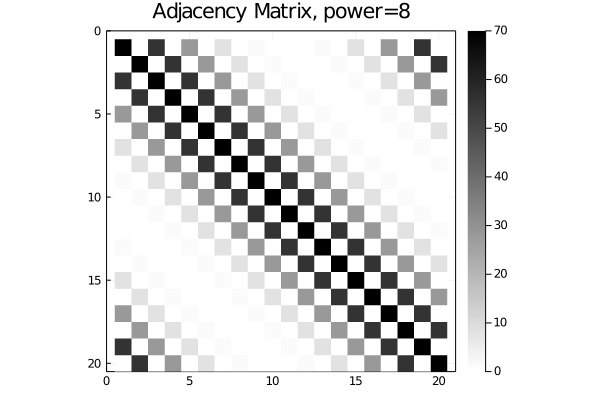

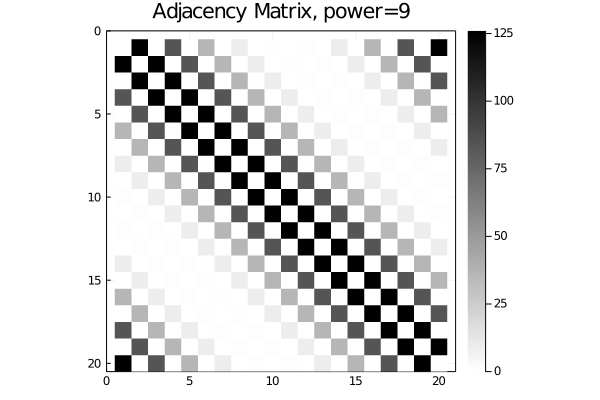

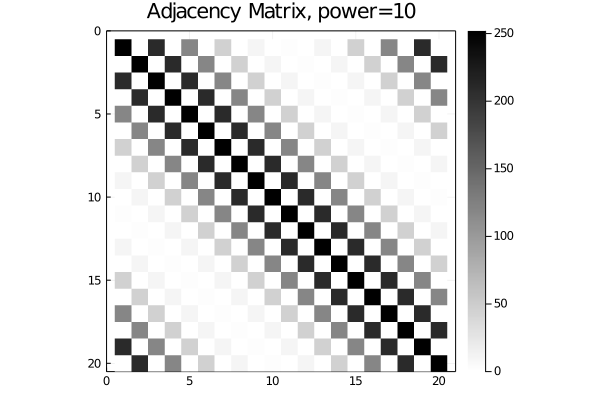

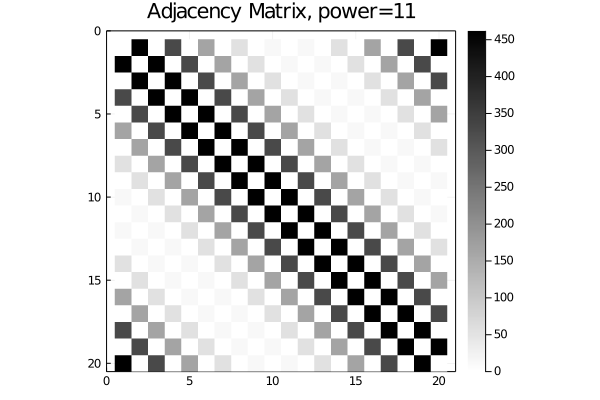

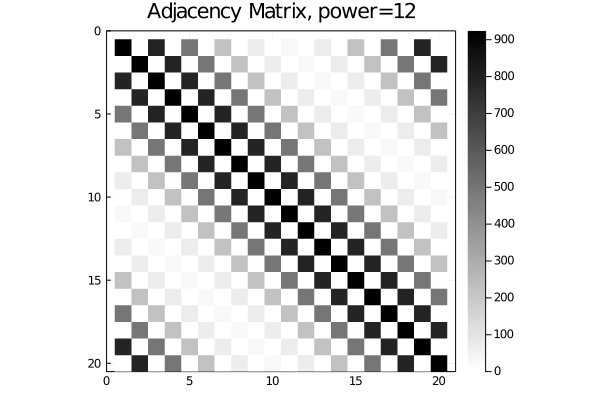

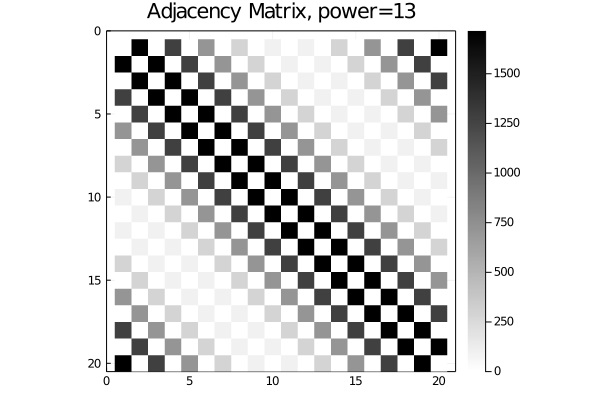

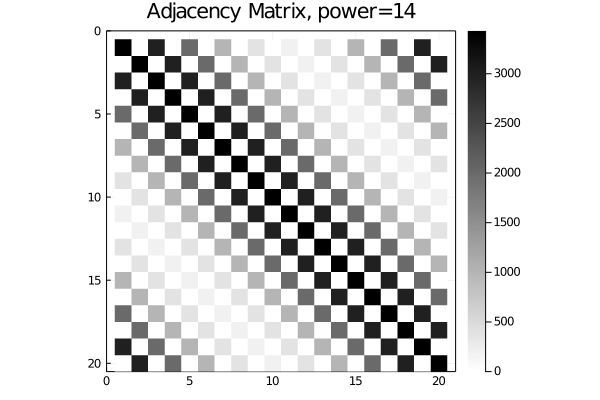

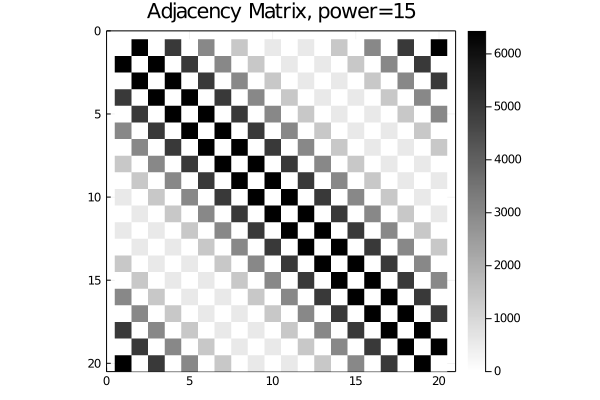

In [55]:
for i in 0:K_MAX   
    hVarX = vizMatrix(Adj_Dict[i],i)
    p1=plot(hVarX,layout=1)
    display(p1)
    savefig(p1,"adjmatrixPow$(i).png")    
end


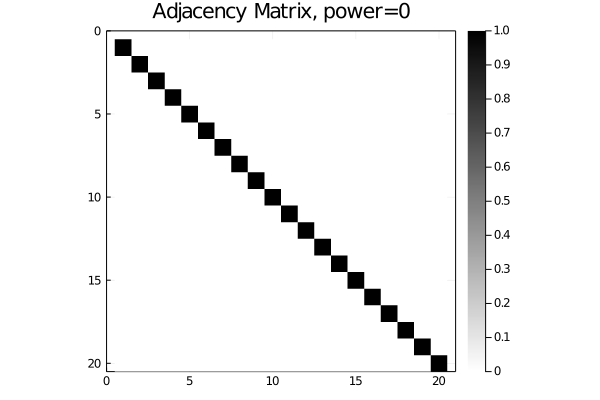

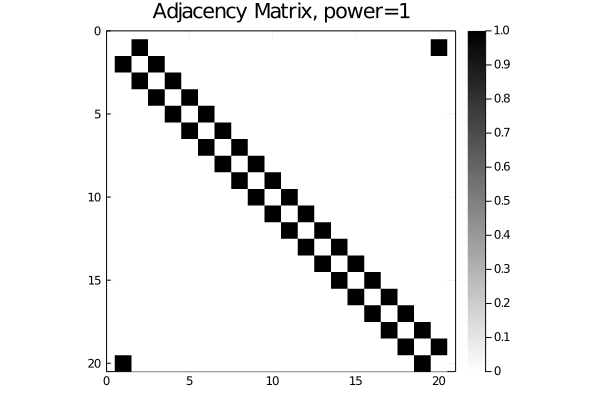

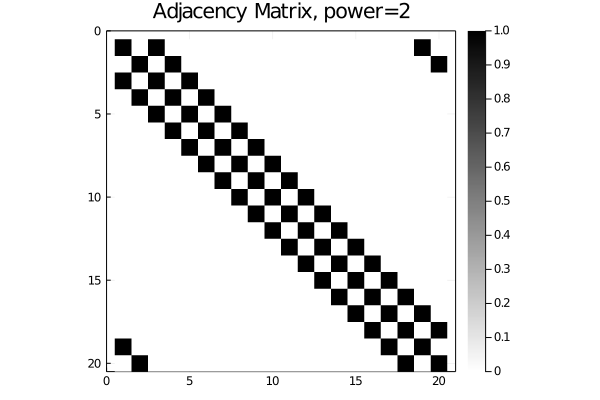

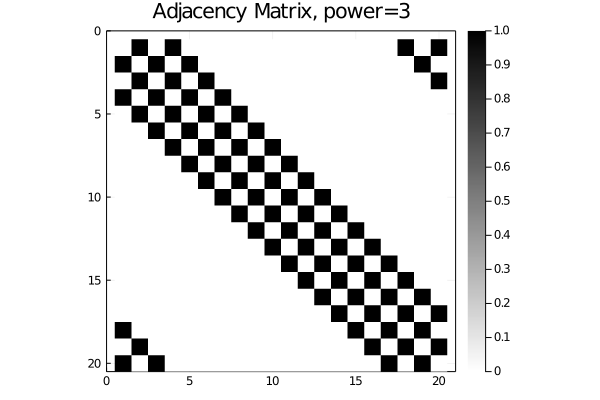

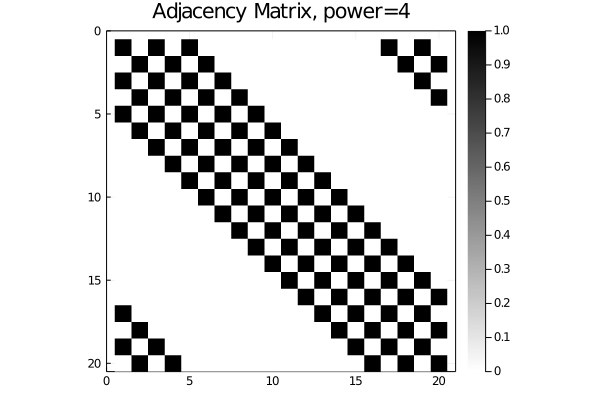

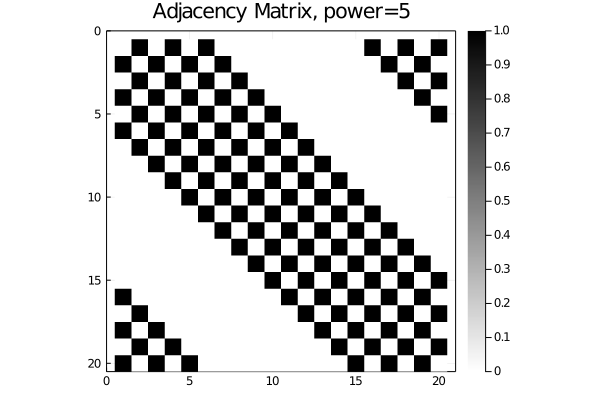

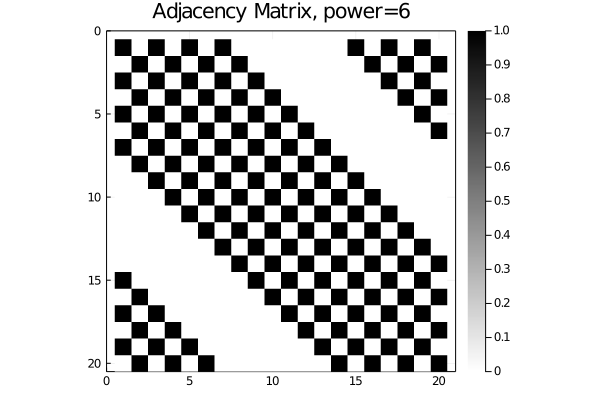

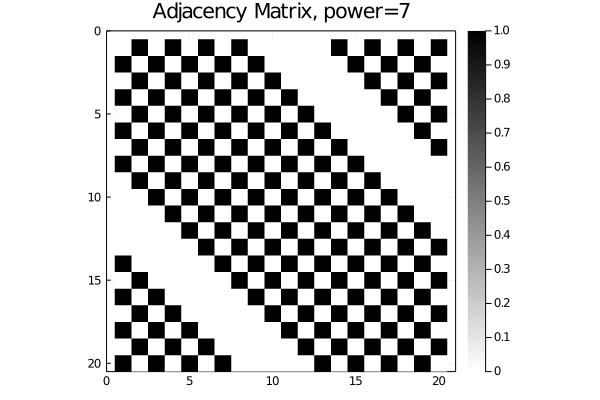

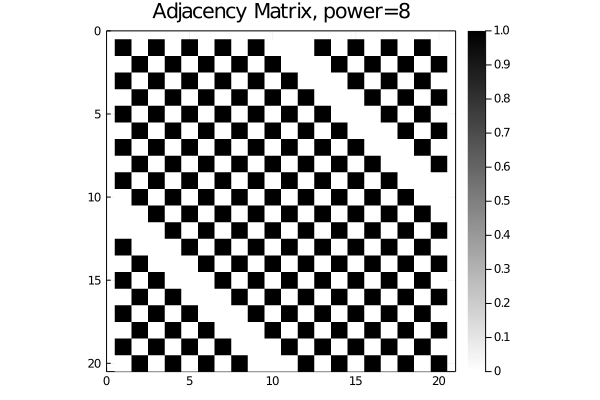

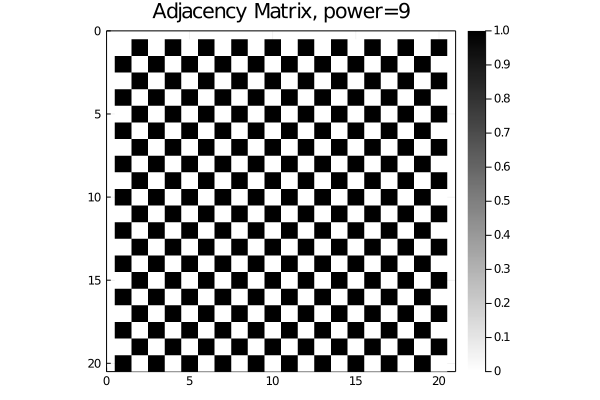

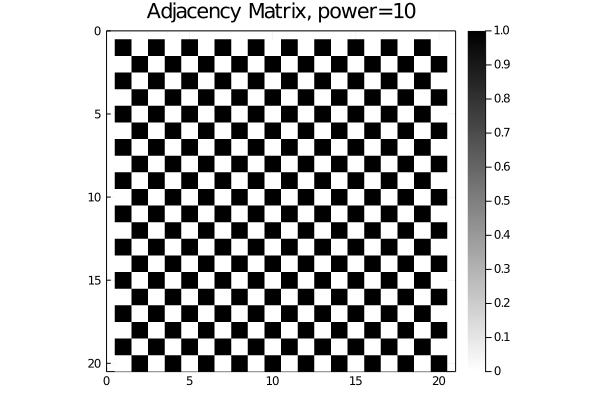

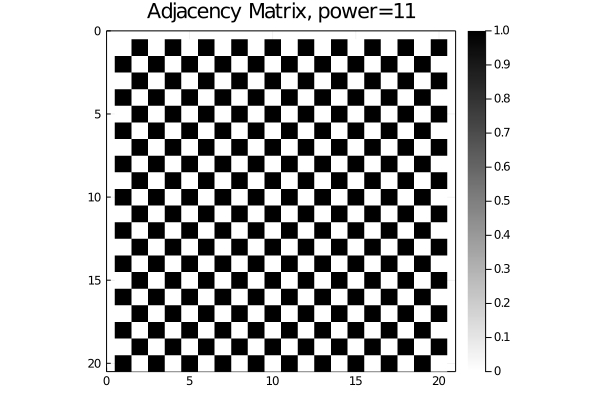

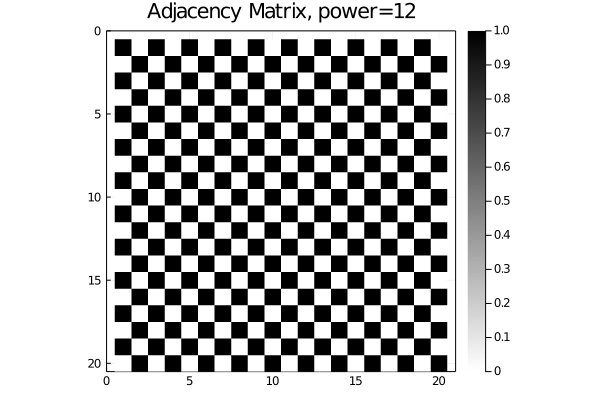

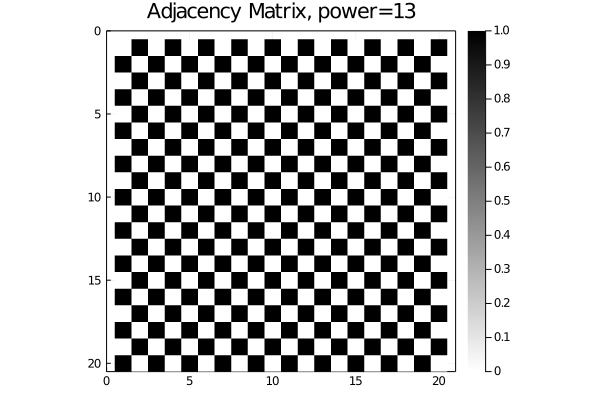

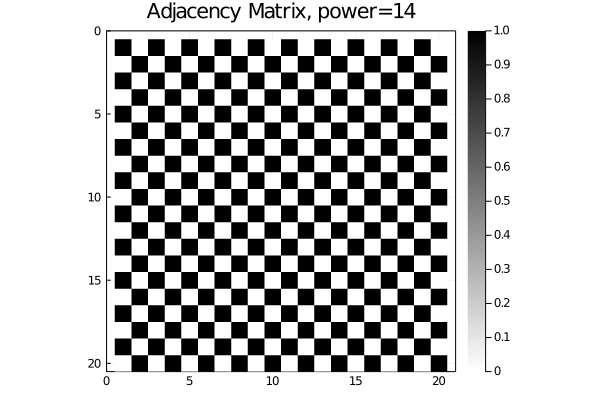

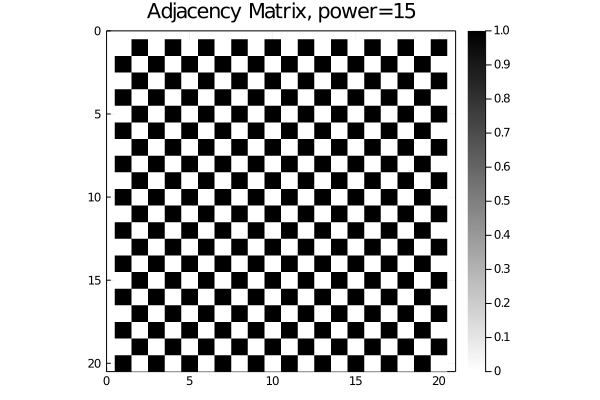

In [79]:
for i in 0:K_MAX   
    hVarX = vizMatrixThresh(Adj_Dict[i],i)
    p1=plot(hVarX,layout=1)
    display(p1)
    savefig(p1,"adjmatrixPowThresh$(i).png")    
end


In [87]:
adjMatrixNorm = adjacency2Smatrix(deepcopy(adjMatrixK1))
Adj_Normed_Dict = Dict()
for i in 0:K_MAX   
    Adj_Normed_Dict[i] = adjMatrixNorm^i
end

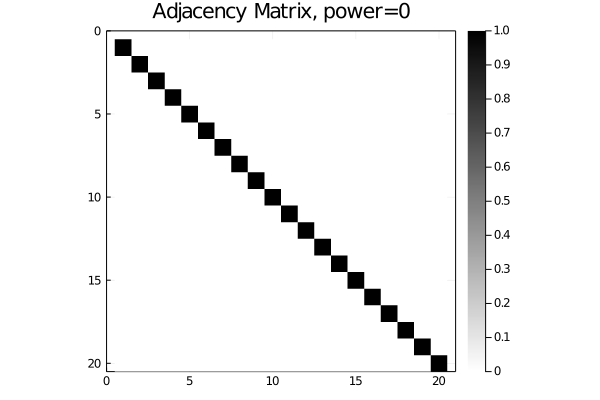

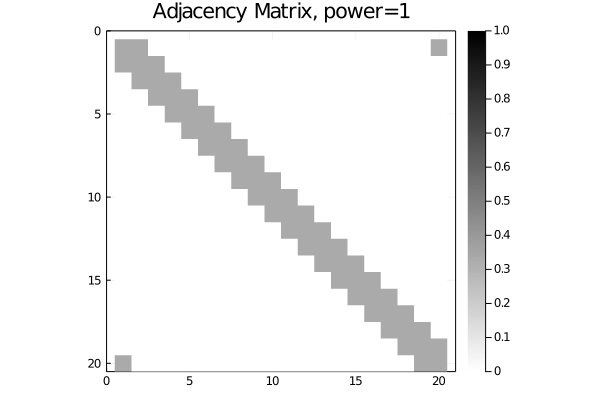

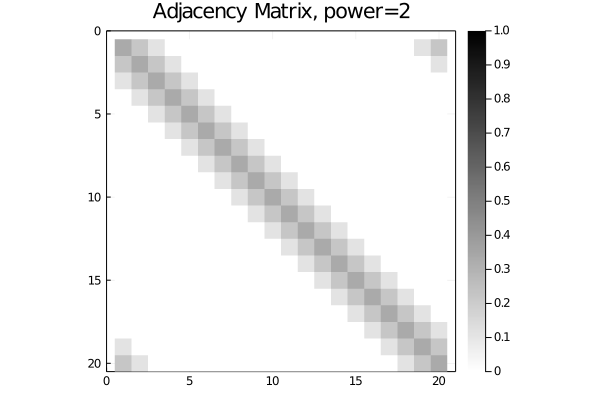

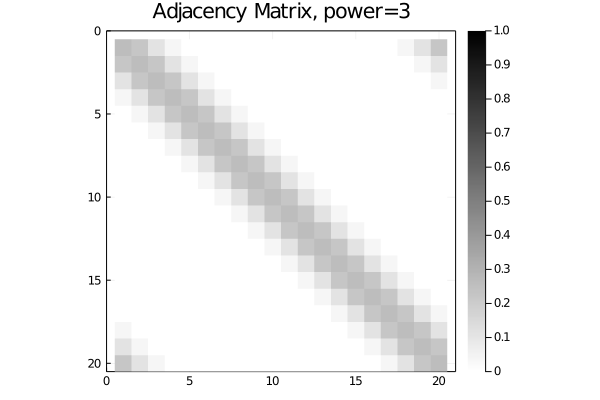

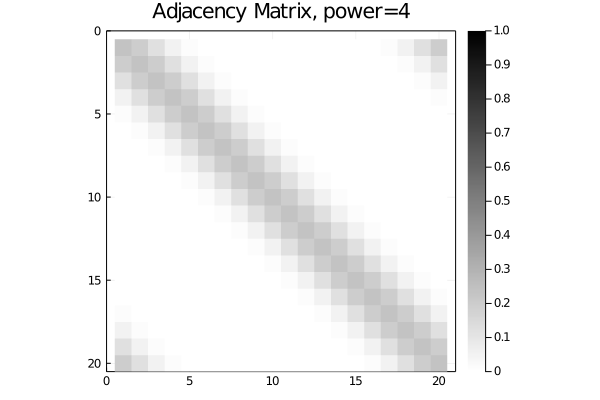

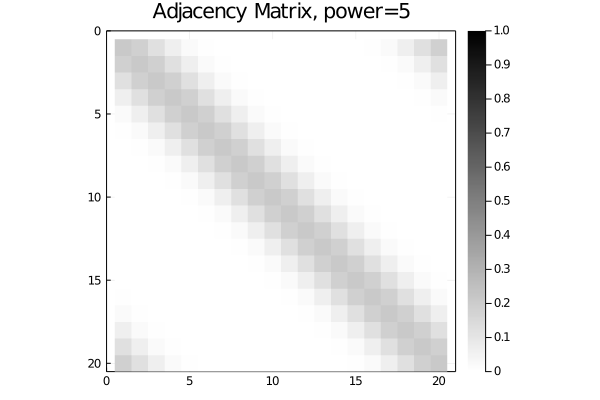

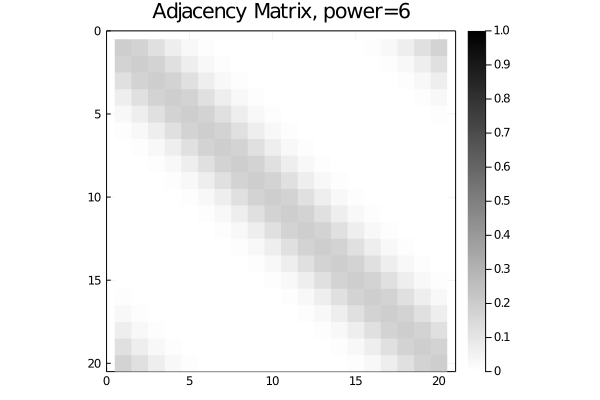

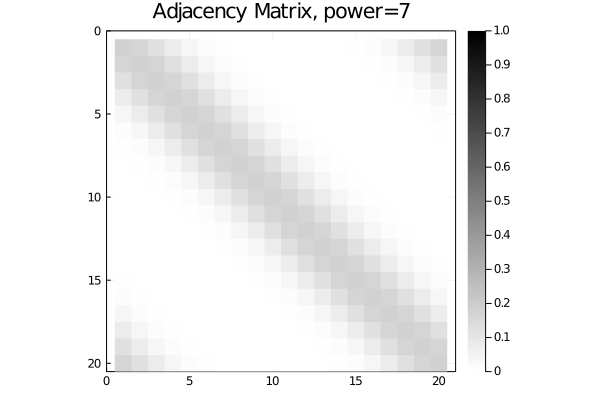

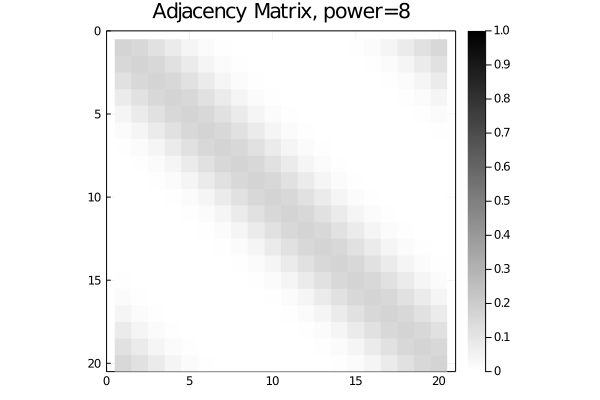

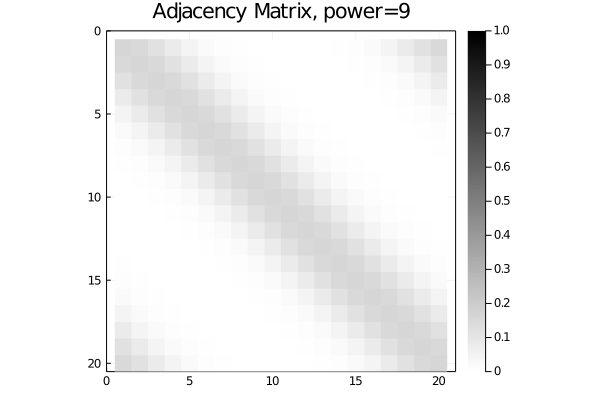

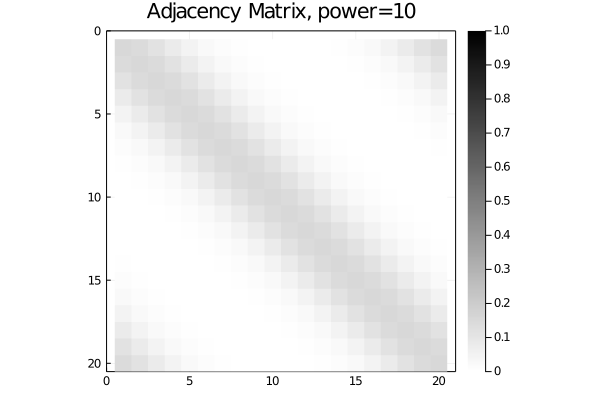

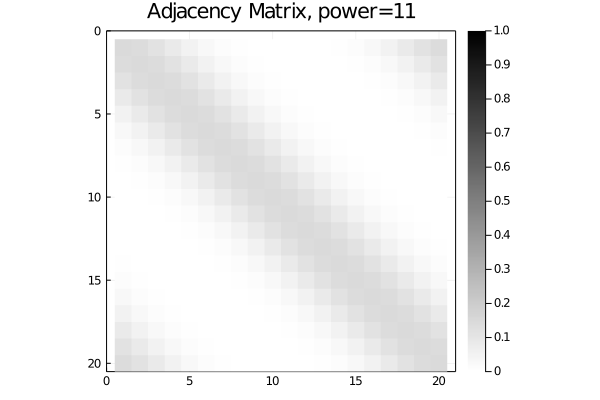

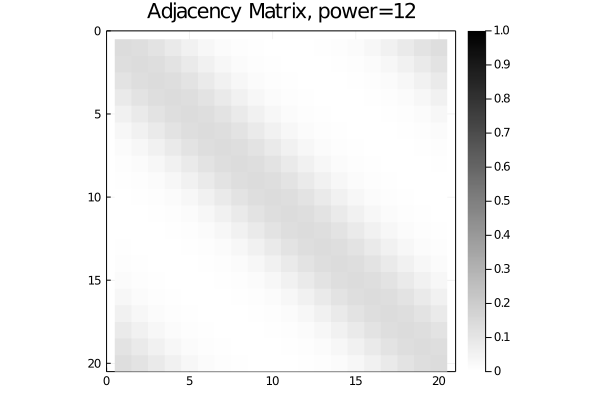

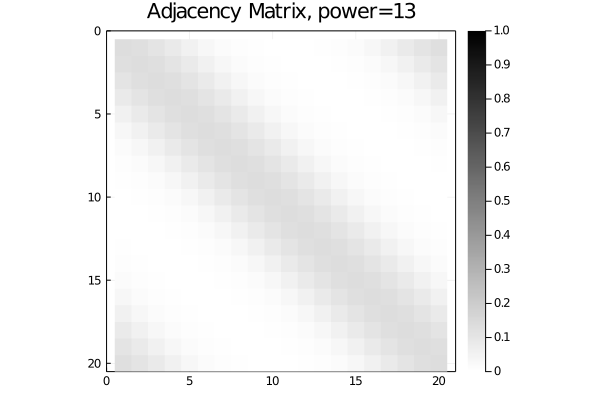

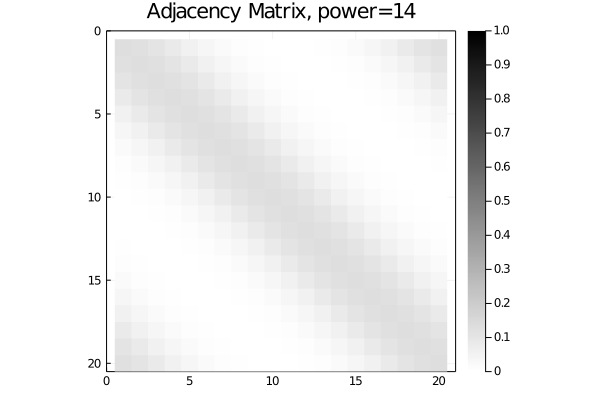

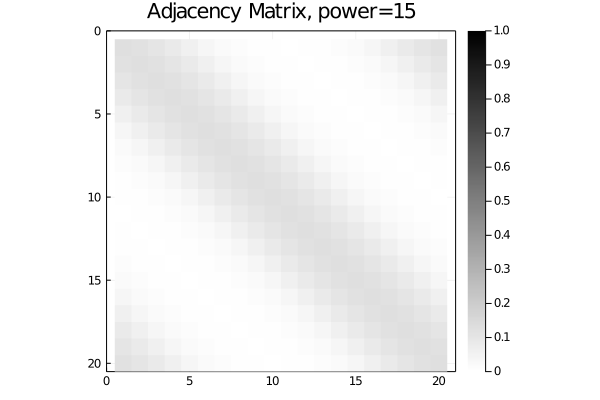

In [88]:
for i in 0:K_MAX   
    hVarX = vizMatrixThresh(Adj_Normed_Dict[i],i)
    p1=plot(hVarX,layout=1)
    display(p1)
    savefig(p1,"adjnormedmatrixPow$(i).png")    
end

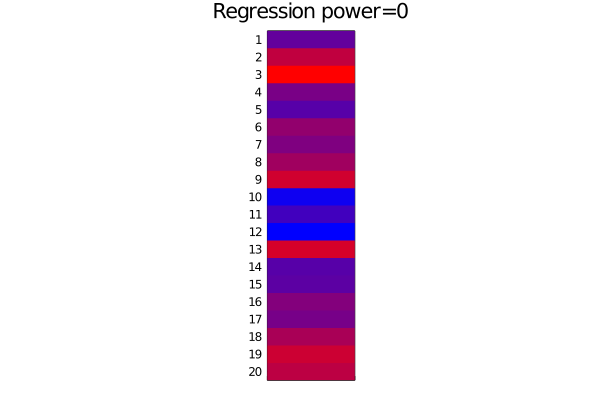

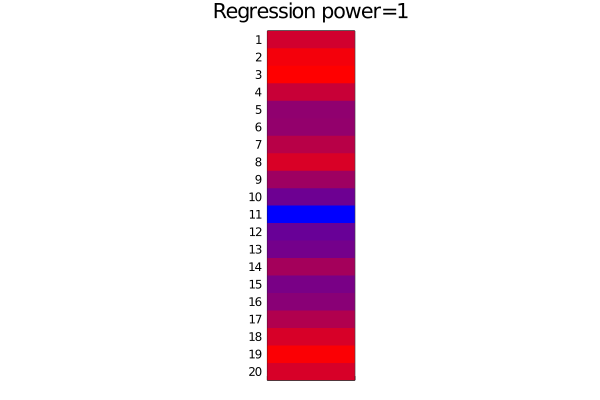

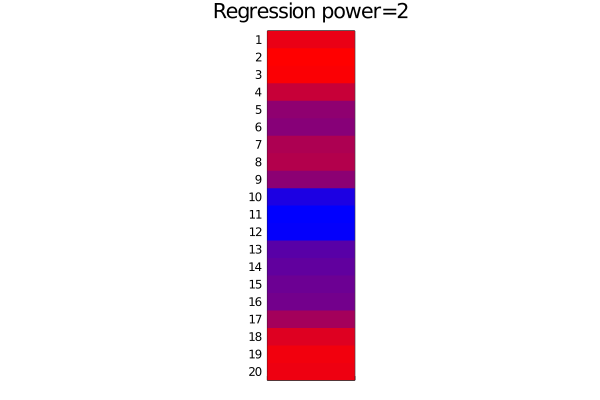

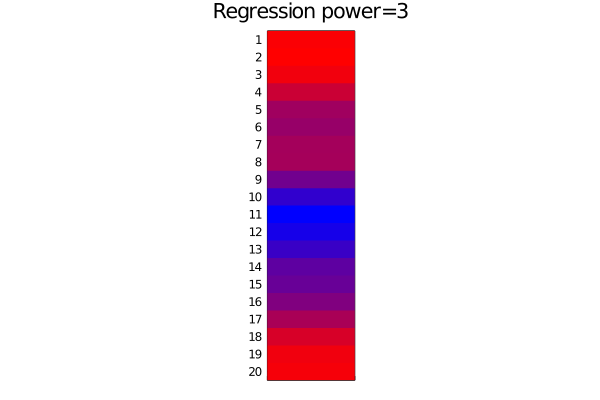

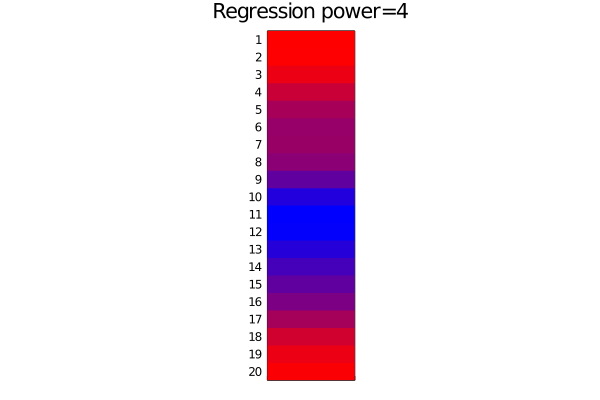

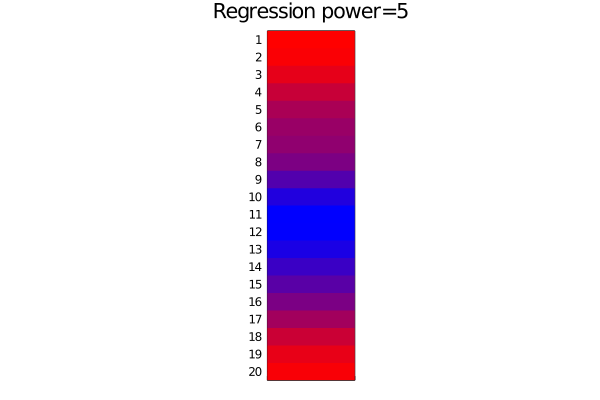

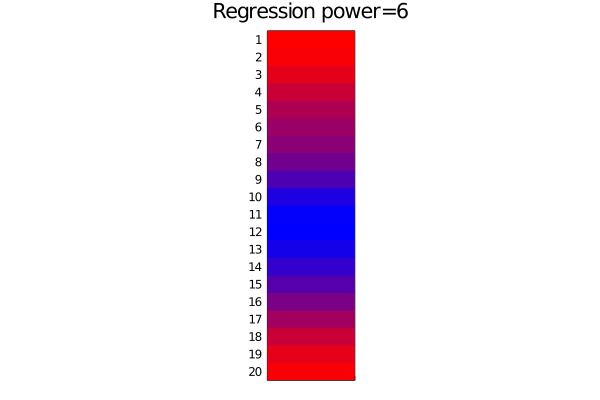

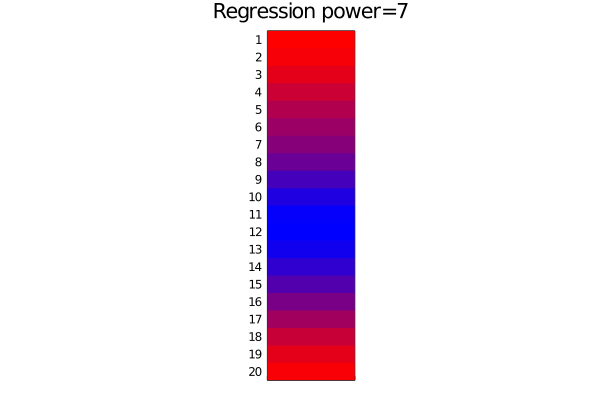

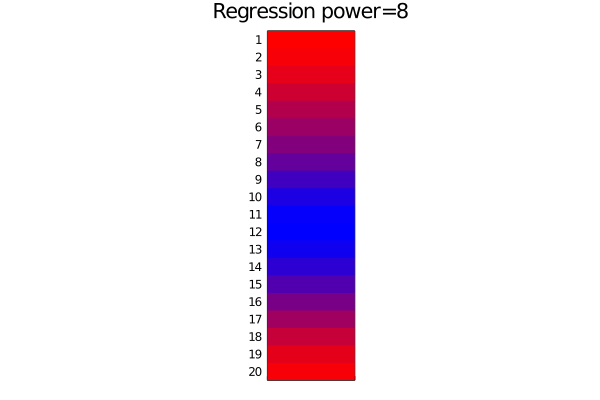

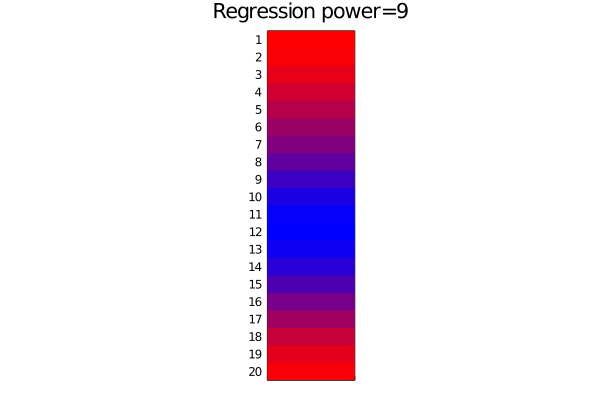

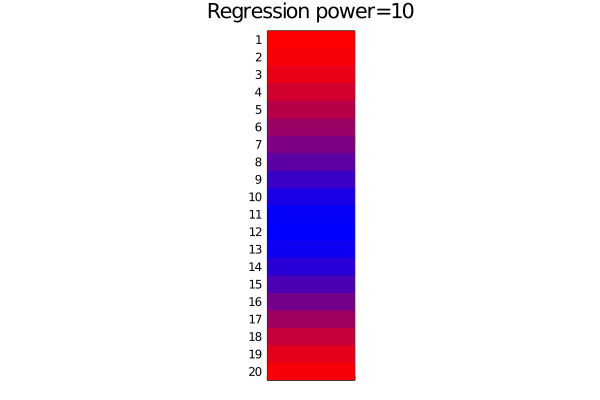

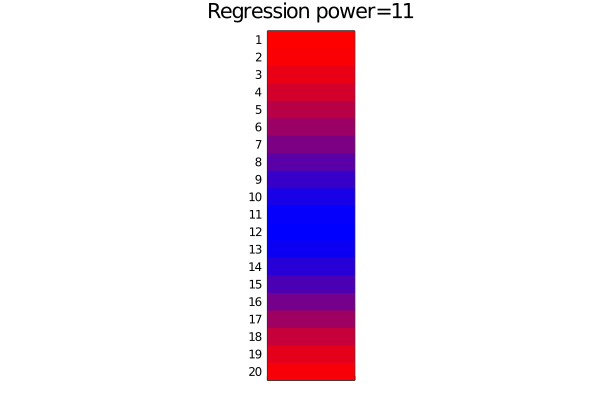

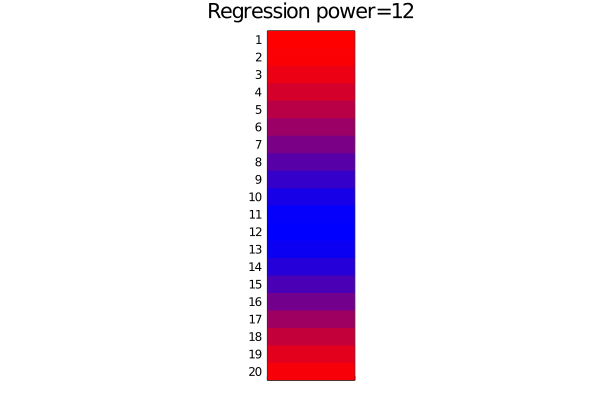

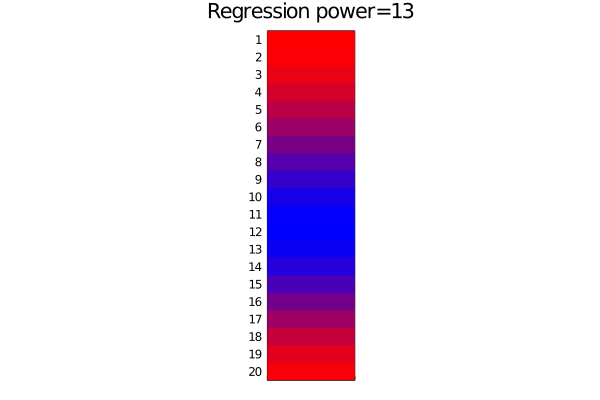

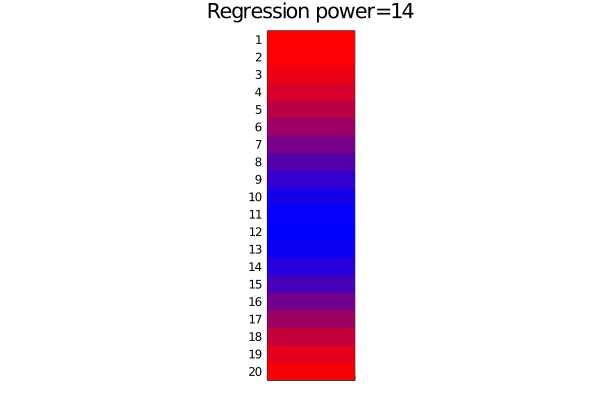

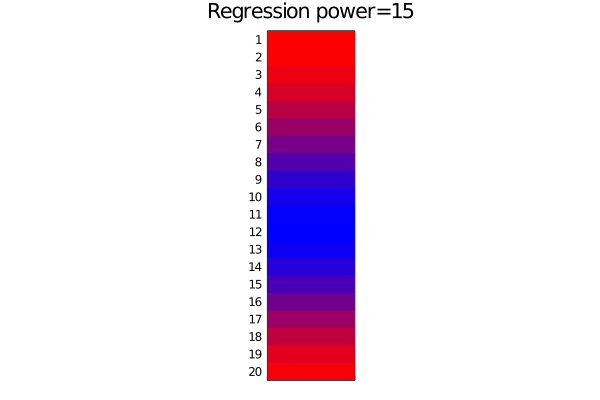

In [97]:
#network feature propagation 
feature_Regression = Dict()
for i in 0:K_MAX   
    feature_Regression[i] = Adj_Normed_Dict[i] * varX
end

for i in 0:K_MAX   
    hVarX = displayProjectedFeature(feature_Regression[i],i) 
    p3=plot(hVarX,layout=1)
    display(p3)
    savefig(p3,"Regression Pow$(i).png")    
end



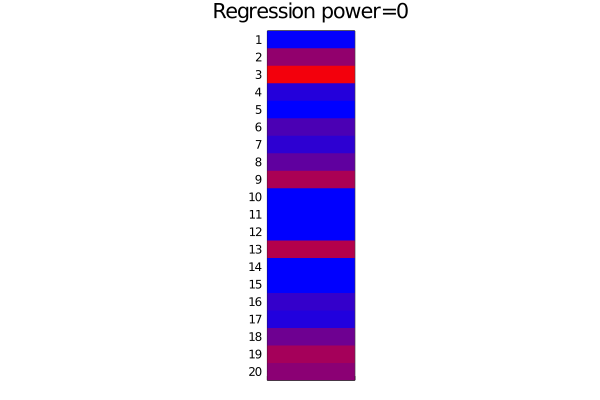

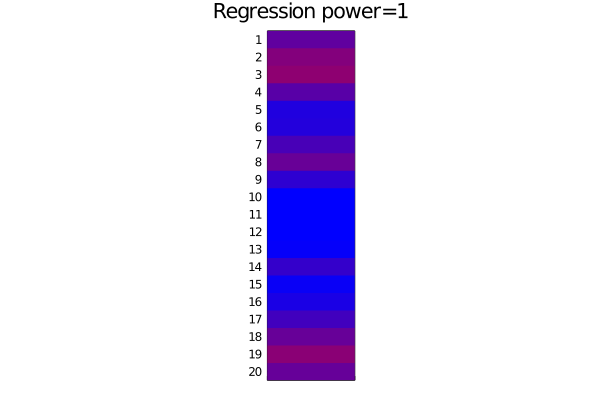

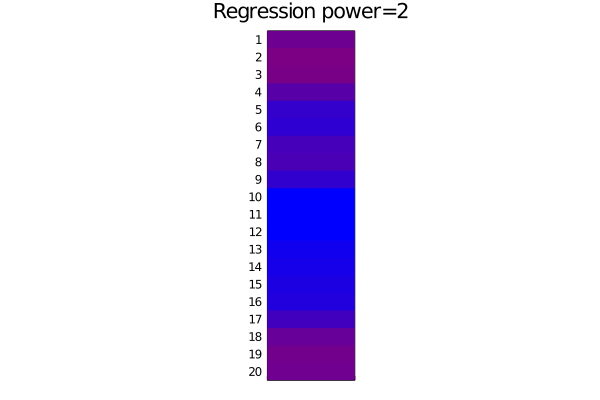

[0.010437603853343358; 0.5736485585190982; 0.9515912202226742; 0.14157320044138055; -0.06123889445033415; 0.2946007040142202; 0.17732488626145426; 0.37696271168717344; 0.6701156080253705; -0.503162226572557; -0.1974841855456475; -0.5877483905845917; 0.7050044033123641; -0.06339542250404717; -0.030020778748387933; 0.20473971707708083; 0.13018693389066338; 0.43185415395281557; 0.6453459147445986; 0.5464187663934021]
[0.37683497625528123; 0.5118924608650386; 0.5556043263943843; 0.3439751754045735; 0.1249783366684222; 0.13689556527511343; 0.28296276732094927; 0.4081344019913327; 0.18130536437999561; -0.010176934697611356; -0.42946493423426535; -0.026742724272625; 0.01795353007457509; 0.20386273401997634; 0.03710783860821524; 0.10163529073978542; 0.2555936016401866; 0.40246233419602584; 0.5412062783636054; 0.40073409499711465]


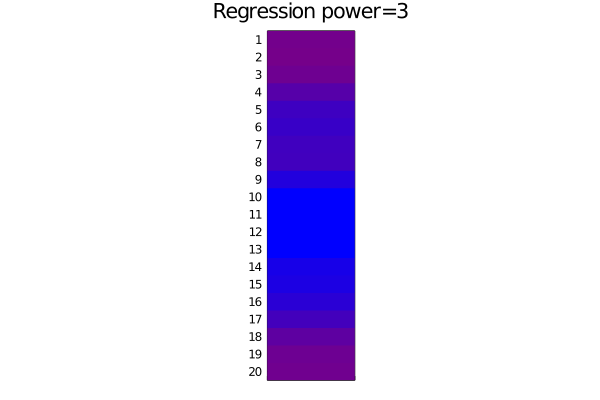

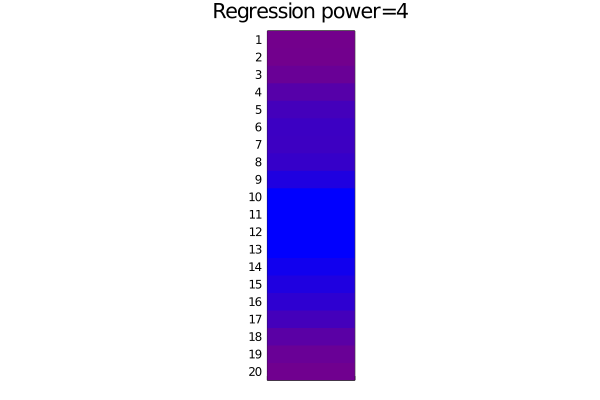

[0.42982051070581145; 0.481443921171568; 0.4704906542213321; 0.34151927948912664; 0.2019496924493697; 0.18161222308816166; 0.2759975781957985; 0.29080084456409255; 0.19308761055790566; -0.08611216818396038; -0.15546153106816726; -0.14608470947743843; 0.06502451327397546; 0.08630803423425557; 0.11420195445599235; 0.1314455769960624; 0.25323040885866593; 0.3997540713999393; 0.44813423585224865; 0.43959178320533376]
[0.4502854050275711; 0.4605850286995705; 0.4311512849606756; 0.33798654205327616; 0.24169373167555266; 0.2198531645777766; 0.24947021528268423; 0.25329534443926555; 0.1325920956460126; -0.01616202956474068; -0.12921946957652203; -0.07884057575721007; 0.001749279343597504; 0.08851150065474113; 0.11065185522877011; 0.16629264677024022; 0.26147668575155586; 0.3670395720369513; 0.4291600301525072; 0.439182176587798]


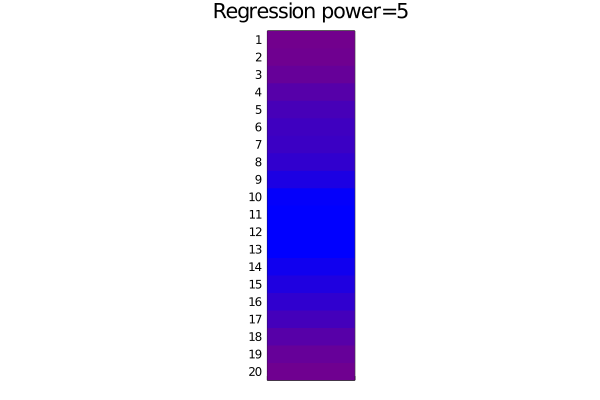

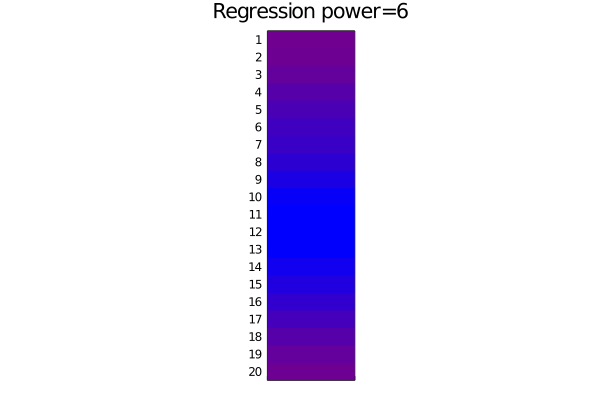

[0.4500175367716466; 0.4473405728959391; 0.40990761857117414; 0.3369438528965015; 0.26651114610220183; 0.23700570384533784; 0.2408729080999088; 0.21178588512265412; 0.12324180350684585; -0.0042631344984166986; -0.07474069163282426; -0.06877025533004488; 0.0038067347470428503; 0.06697087840903625; 0.1218186675512505; 0.17947372925018873; 0.2649363015195825; 0.35255876264700475; 0.4117939262590855; 0.43954253725595877]
[0.4456335489745148; 0.4357552427462532; 0.39806401478787157; 0.33778753918995913; 0.28015356761468035; 0.24812991934914946; 0.22988816568930026; 0.19196686557646958; 0.11025485137702778; 0.01474599245853496; -0.04925802715376196; -0.04656807073860875; 0.0006691192753447428; 0.06419876023577653; 0.12275442507015846; 0.1887428994403406; 0.26565626447225865; 0.3430963301418909; 0.401298408720683; 0.4337846667622302]


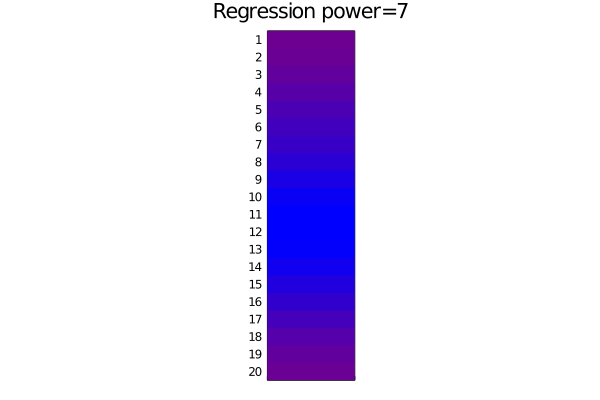

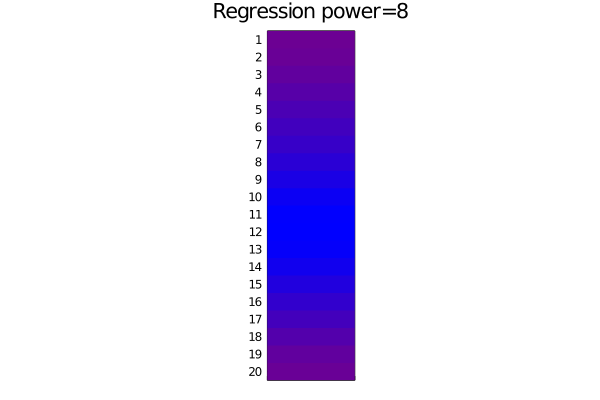

[0.4383911528276661; 0.42648426883621315; 0.390535598908028; 0.33866837386417037; 0.288690342051263; 0.25272388421771; 0.2233283168716398; 0.17736996088093254; 0.1056559031373441; 0.025247605560600253; -0.0270267018112786; -0.03171899287234203; 0.006099936257504171; 0.06254076819375994; 0.12523202824875848; 0.19238452966091923; 0.2658318313514967; 0.33668366777827746; 0.39272646854160137; 0.4269055414858094]
[0.43059365438322955; 0.4184703401906358; 0.3852294138694705; 0.33929810494115376; 0.2933608667110478; 0.2549141810468709; 0.21780738732342744; 0.1687847269633055; 0.102757823192959; 0.034625602295555245; -0.01116602970767347; -0.01754858614203883; 0.012307237192974052; 0.06462424423334087; 0.1267191087011459; 0.19448279642039148; 0.2649666762635645; 0.3317473225571252; 0.38543855926856274; 0.4193410542850256]


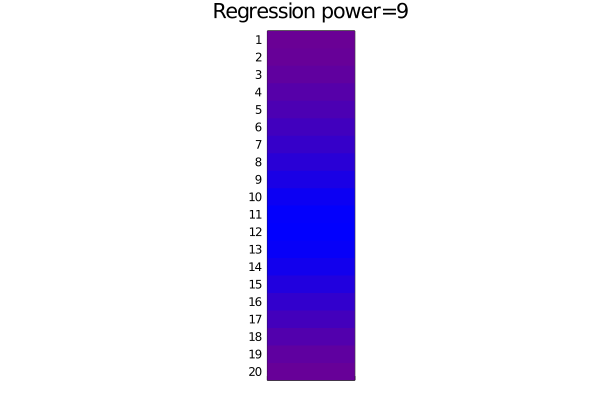

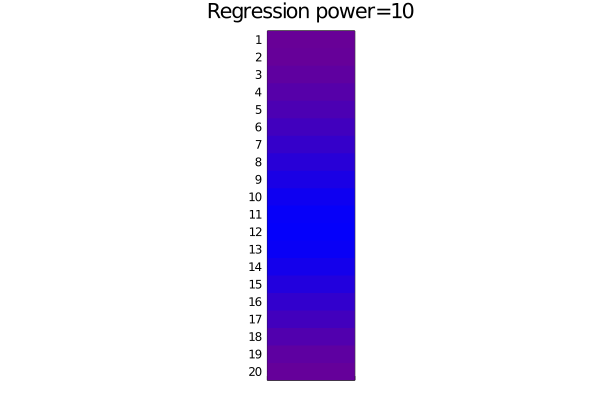

[0.4228016829529636; 0.4114311361477786; 0.3809992863337533; 0.339296128507224; 0.29585771756635754; 0.25536081169378205; 0.21383543177786796; 0.163116645826564; 0.10205605081727318; 0.042072465260280294; 0.001970328815280975; -0.005469126218912712; 0.019794298428092036; 0.06788353004248697; 0.1286087164516261; 0.1953895271283673; 0.2637322650803604; 0.3273841860297508; 0.37884231203690455; 0.4117910893122726]
[0.4153413028043383; 0.40507736847816517; 0.3772421836629186; 0.33871771080244495; 0.29683821925578785; 0.25501798701266915; 0.21077096309940463; 0.15966937614056836; 0.10241505396803915; 0.048699614964278166; 0.012857889285549498; 0.005431833674820127; 0.027402900750555445; 0.07209551497406831; 0.13062725787416007; 0.19591016955345125; 0.26216865941282613; 0.3233195877156719; 0.37267252912630927; 0.4044783614340469]


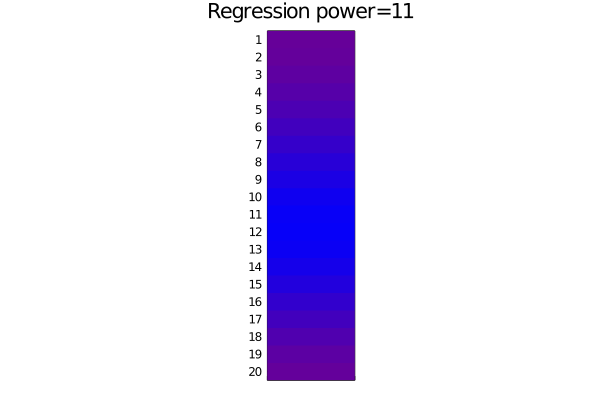

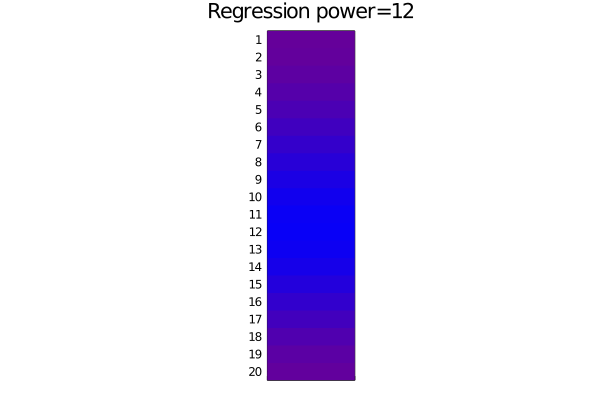

[0.4082990109055168; 0.3992202849818073; 0.3736790876478429; 0.33759937124038375; 0.2968579723569673; 0.2542090564559539; 0.20848610875088075; 0.15761846440267072; 0.1035946816909619; 0.05465751940595559; 0.022329779308215933; 0.015230874570308361; 0.03497674979981463; 0.07670855786626127; 0.13287764746722658; 0.19623536228014585; 0.2604661388939831; 0.31938692541826913; 0.3668234927586761; 0.3974973977882315]
[0.40167223122518514; 0.3937327945117224; 0.3701662479566781; 0.3360454770817314; 0.2962221333511017; 0.25318437918793396; 0.2067712098698351; 0.15656641828150447; 0.10529022183319611; 0.06019399346837782; 0.03073939109482661; 0.024179134559446286; 0.04230539407879476; 0.08152098504443414; 0.1352738558712112; 0.19652638288045182; 0.258696142197466; 0.315558852356976; 0.3612359386550589; 0.39087330048414143]


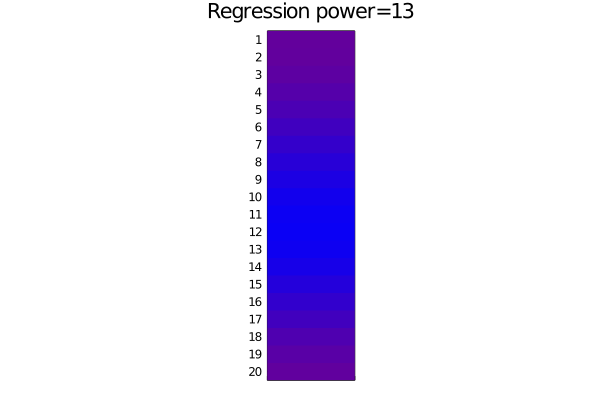

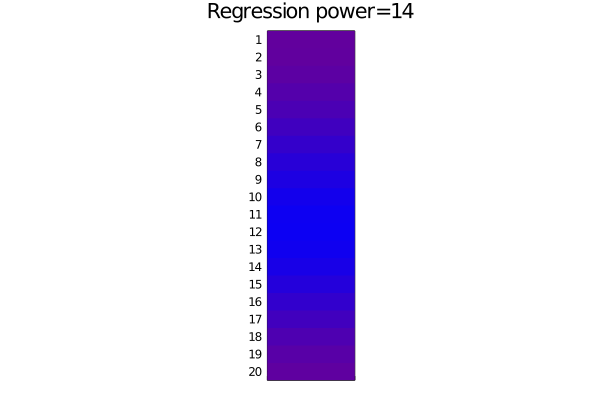

[0.39542610874034967; 0.3885237578978618; 0.3666481731833773; 0.33414461946317037; 0.29515066320692235; 0.25205924080295694; 0.20550733577975788; 0.15620928332817857; 0.10735021119435947; 0.06540786879880013; 0.03837083970755023; 0.03240797324435589; 0.049335171227558455; 0.08636674499814669; 0.13777374126536576; 0.19683212698304303; 0.25692712581163135; 0.3118303110698336; 0.35588936383205877; 0.38459382345479515]
[0.38951456336433554; 0.3835326799405296; 0.3631055168481364; 0.33198115195115663; 0.2937848411576832; 0.2509057465965457; 0.2045919533036311; 0.15635561010076532; 0.10965578777377938; 0.0703763065669033; 0.045395560583568785; 0.04003799472648818; 0.056036629823353654; 0.09115855249702356; 0.14032420441551846; 0.19717766468668; 0.2551965212881693; 0.3082156002378412; 0.3507711661188959; 0.3786364320090679]


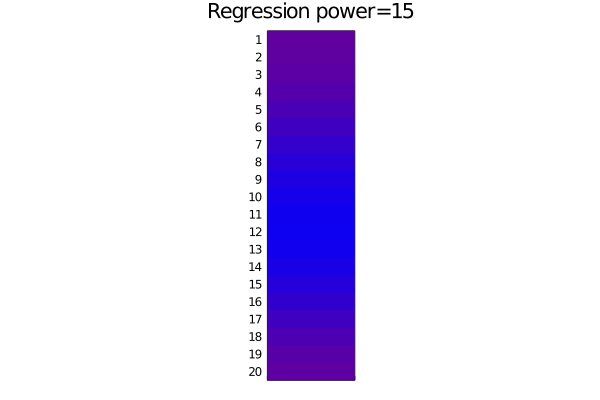

[0.38389455843797765; 0.3787175867176672; 0.35953978291327426; 0.3296238366523254; 0.29222391323512853; 0.24976084701928664; 0.20395110333364735; 0.15686778372605859; 0.11212923481381595; 0.07514255164141714; 0.05193662062565345; 0.047156728377803554; 0.06241105901562184; 0.0958397955786319; 0.1428868071997407; 0.1975661301301226; 0.2535299287375635; 0.30472776254830214; 0.3458743994552683; 0.3729740538307664]
[0.3785287329954704; 0.3740506426896397; 0.35596040209442237; 0.3271291776002427; 0.2905361989689135; 0.2486452878626875; 0.20352657802633084; 0.15764937395784062; 0.11471319006043057; 0.07973613569362885; 0.0580786335482913; 0.05383480267302626; 0.06846919432401907; 0.10037922059799811; 0.14543091096949845; 0.1979942886891423; 0.25194127380532944; 0.301377363580378; 0.34119207194477896; 0.3675810039080041]


In [100]:
#network feature propagation 
feature_Regression = Dict()
for i in 0:K_MAX   
    feature_Regression[i] = Adj_Normed_Dict[i] * varX
end

for i in 0:K_MAX   
    hVarX = displayProjectedFeatureThres(feature_Regression[i],i) 
    p3=plot(hVarX,layout=1)
    display(p3)
    savefig(p3,"Regression PowThres$(i).png")  
    println(feature_Regression[i])
end


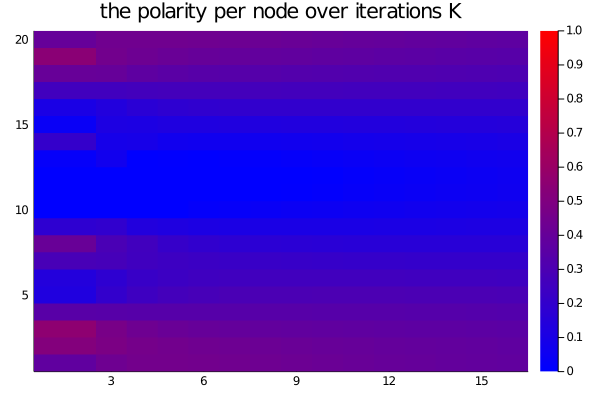

In [107]:
vecTmp = feature_Regression[1]

for i in 1:K_MAX   
    vecTmp = hcat(vecTmp,feature_Regression[i])
end
h1 = heatmap(vecTmp,fill=cgrad([:blue,:red]),clims=(0,1))
title!("the polarity per node over iterations K")
display(h1)
savefig(h1,"heatmapProgression.png") 

In [ ]:
#now plot the lines for each node

In [ ]:
#now show the distribution between polar sides as total sum above or below

In [ ]:
#now draw the change points 

In [418]:
##methodology